### 7-1. K-평균 알고리즘의 이해

- 군집 중심점이라는 특정한 임의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집화에서 가장 일반적으로 사용되는 알고리즘

![7-1](img7/7-1.png)

1) 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음  
2) 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속  
3) 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동  
4) 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속 변경  
5) 다시 중심을 소속된 데이터의 평균 중심으로 이동  
6) 중심점을 이동했는데 데이터들의 중심점 소속 변경이 없으면 군집화 종료  

·장점 
 - 알고리즘이 쉽고 간결

·단점
 - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (※ PCA로 차원 감소 적용하기도 함)
 - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
 - 몇 개의 군집을 선택해야 할지 가이드가 어려움

#### 사이킷런 KMeans 클래스 소개

- n_clusters: 군집 중심점의 개수
- max_iter: 최대 반복 횟수
- init: 초기에 군집 중심점의 좌표를 설정할 방식

·주요 속성 정보
 - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
 - cluster_centers_ : 각 군집 중심점 좌표

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [43]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


3개의 그룹으로 군집화

In [44]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

=>fit() 을 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환

labels_ 속성값 출력

In [45]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


=> 각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인

In [46]:
# irisDF['cluster']=kmeans.labels_ 개정 소스코드 변경(2019.12.24)

irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


※target 군집과 cluster 군집은 동일한 것 아님 !. cluster 군집은 임의의 값

다음으로 군집화를 시각화
붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합하기 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X,Y 좌표로 개별 데이터 표현

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


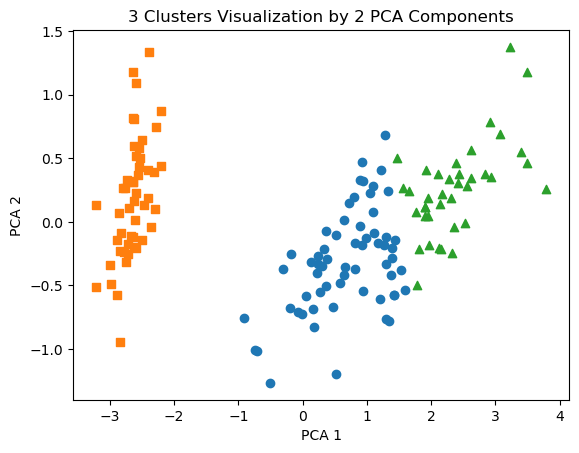

In [48]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 군집화 알고리즘 테스트를 위한 데이터 생성

·대표적인 군집화용 데이터 생성기로는 make_bolbs()와 make_classification() API가 존재
·make_bolbs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환됨

- n_samples:생성할 총 데이터의 개수 (디폴트는 100)
- n_features: 데이터의 피처 개수 (시각화를 목표를 할 경우 2개로 설정함)

- centers: int 값, 군집의 개수
- cluster_std: 생성될 군집 데이터의 표준 편차

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


=>  피처 데이터 세트의 X,Y의 shape을 볼 수 있으며, 각 군집([0,1,2])은 67,67,66개로 균일하게 구성되어 있음

In [50]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


피처 데이터 세트가 어떤 군집화 분포를 가지고 만들어졌는지 확인

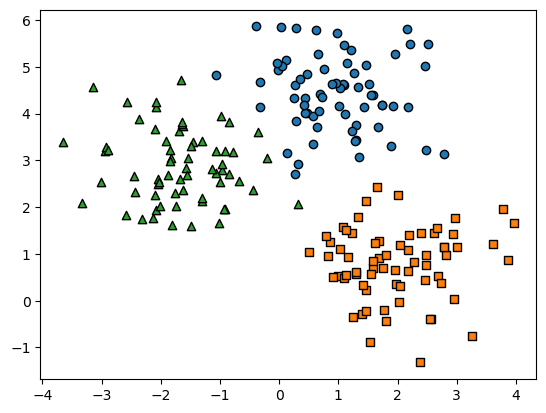

In [51]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

=> 3개의 구분될 수 있는 군집 영역으로 피처 데이터 세트가 만들어졌음을 알 수 있다

이 데이터 세트에 KMeans 군집화를 수행한 뒤 군집별로 시각화

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


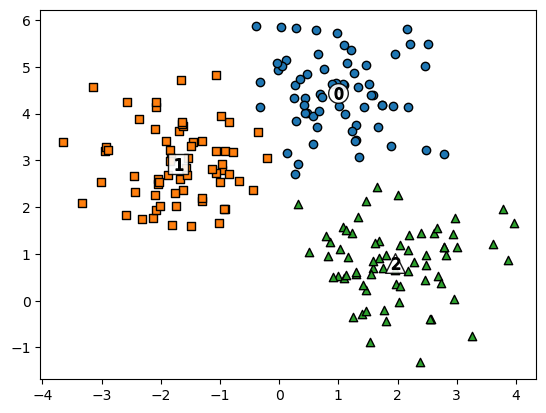

In [52]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [53]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


make_bolbs()는 cluster_std 파라미터로 데이터의 분포도 조절함
cluster_std가 작을수록 군집 중심에 데이터가 모여진다

![7-2](img7/7-5.png)

### 7-2. 군집평가

대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 갖고 있지 않다

군집화는 분류와 유사해 보일 수 있으나 성격이 많이 다름
데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 갖고 있다

군집화의 성능을 평가하는 대표적인 방법으로는 실루엣 분석이 있다

실루엣 분석

각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄

·효율적으로 잘 분리됨 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐짐
·실루엣 계수를 기반으로 함
  - 실루엣 계수 : 개별 데이터가 가지는 군집화 지표
  - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표
![7-3](img7/7-6.png)

Cluster A 내의 데이터 포인트들 끼리 평균 거리 : a(i)  
Cluster B 내의 데이터 포인트들 끼리 평균 거리 : b(i) 라고할 때 , 두 군집 간의 거리가 얼마나 떨어져 있는가의 값 : b(i) - a(i)  
=>이 값을 정규화하기 위해 Max(a(i),b(i)) 값으로 나눔

∴ i번째 데이터 포인트의 실루엣 계수 값 s(i)
![7-4](img7/7-7.png)

· 실루엣 계수는 -1에서 1 사이의 값을 가짐
 - 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것
 - 0에 가까울수록 근처의 군집과 가까워진다는 것
 - -값은 아예 다른 군집 

·사이킷런의 메서드
 - silhouette_samples : 각 데이터 포인트의 실루엣 계수 반환
 - silhouette_score : 전체 데이터의 실루엣 계수 값을 평균해 반환 (=np.mean(silhouette_samples()))
     보통 값이 높으면 군집화가 어느정도 잘 됐다고 판단 가능하지만 무조건은 아님

·좋은 군집화가 되기 위한 조건
 1) 전체 실루엣 계수의 평균값은 0~1 사이의 값을 가지며 , 1에 가까울수록 좋음  
 2) 개별 군집의 평균값의 편차가 크지 않아야함

#### 붓꽃 데이터 세트를 이용한 군집평가

In [54]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


=> 1번 군집의 경우 0.8 이상의 높은 실루엣 계수를 나타내고 있다

군집 별 평균 실루엣 계수값

In [55]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

=> 1번에 비해 0,2번의 실루엣 계수 평균 값이 상대적으로 낮음

#### 군집별 평균 실루엣 계수의 시각화 통한 군집 개수 최적화 방법

- 전체 데이터의 평균 실루엣 계수값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 되었다고 볼 수 없음
- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 k-평균의 적절한 군집 개수가 설정됐다고 판단 가능
![7-5](img7/7-8.png)
![7-6](img7/7-9.png)
![7-7](img7/7-10.png)

군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수로 만들어 시각화

In [56]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

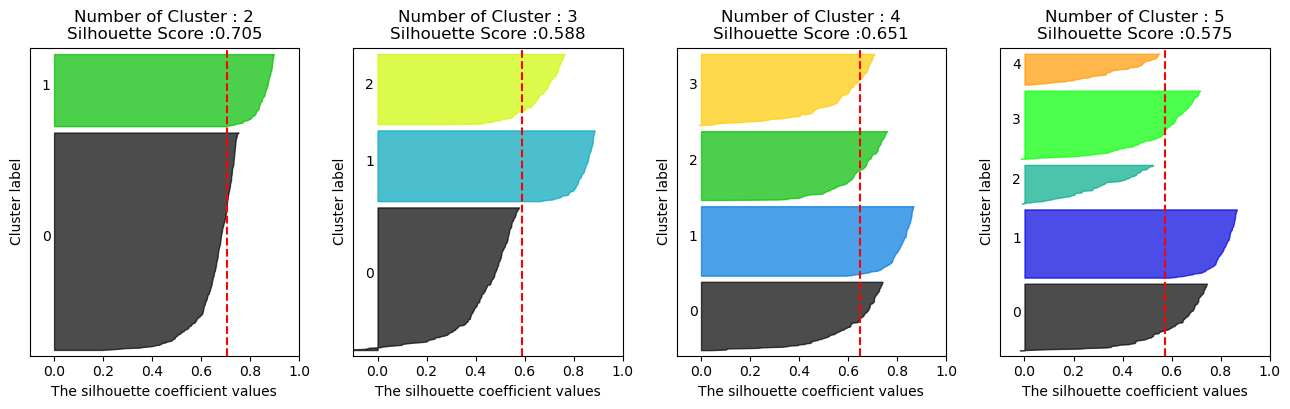

In [57]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

=> make_bolbs 함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트를 만들고 k-평균으로 군집화할 때 최적의 군집개수를 알아보기 위해 표현

∴ 4개의 군집일때가 가장 최적

※silhouette score는 2개의 군집일 때가 가장 높지만 4개일때가 최적

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

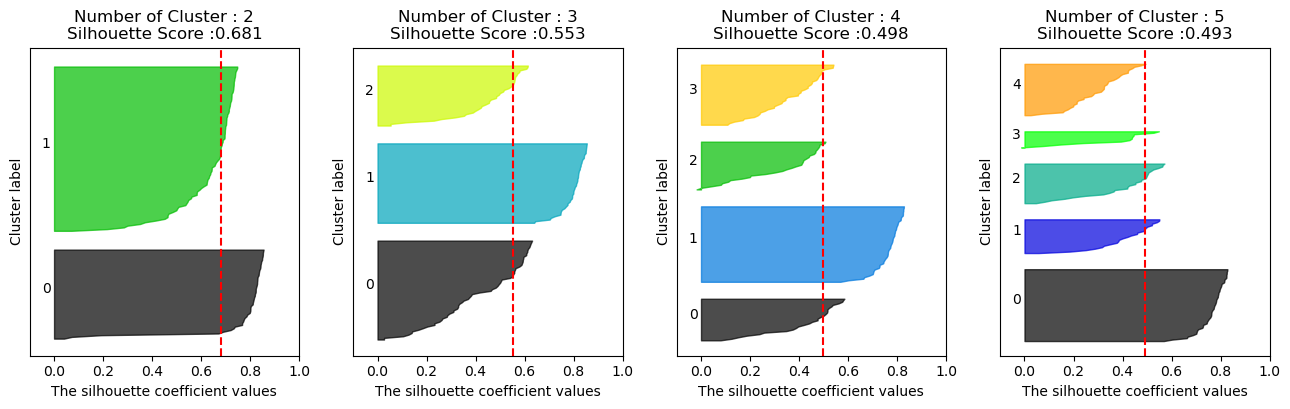

In [58]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

=> 이 경우에는 군집 개수를 2개로 하는 것이 가장 좋아보임

실루엣 계수를 통한 k-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행시간이 크게 늘어남

### 7-3. 평균이동

#### Mean Shift 개요

k-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행

·k-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동 시킴

·데이터의 분포도를 이용해 군집 중심점을 찾음

 - 별도의 군집화 개수를 정하지는 않음
 - 군집 중심점 : 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것 / 확률 밀도 함수 이용
 - 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE이용

·특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이터 하면서 이동하는 방식

![7-8](img7/7-13.png)

<과정>

1) 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터를 포함한 데이터 분포도를 KDE 기반의 mean Shift 알고리즘으로 계산  
2) KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동  
3) 모든 데이터를 1~2 까지 수행하면서 데이터를 이동/ 개별 데이터들이 군집 중심점으로 모임  
4) 지정된 반복 횟수만큼 전체 데이터에 대해 KDE 기반으로 데이터를 이동시키면서 군집화 수행  
5) 개별 데이터들이 모인 중심점을 군집 중심점으로 설정  

·KDE : 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 측정하는 대표적인 방법

 - 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 추정 
 - 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성, 확률 분포 등 많은 요소를 알 수 있다

 ※확률 밀도 함수 특정방법 :모수적 or 비모수적

 - 커널 함수를 적용한 뒤 , 이 적용값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수 추정
  ==> 대표적인 커널 함수 : 가우시안 분포 함수

![7-9](img7/7-14.png)
![7-10](img7/7-15.png)
 => K :커널 함수, x : 확률 변숫값, xi : 관측값, h : 대역폭

·대역폭 h는 KDE 형태를 부드러운 형태로 평활화하는데 적용됨
![7-11](img7/7-16.png)

> h가 너무 작으면 과적합되기 쉬우며(많은 수의 군집 중심점을 가짐), h가 너무 크면 과소 적합 되기 쉽다  

- 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을 수록 많은 수의 군집 중심점을 가짐  
- 또한, 평균이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행  
 KDE 시각화는 distplot을 통해 직관적 이해가 쉬워질 수 있다


In [59]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


=> bandwidth 값을 작게 할수록 군집 개수가 많아짐

데이터 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미침

∴이 bandwidth를 최적화 값으로 설정하는 것이 중요

In [60]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [61]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


=> estimate_bandwidth 은 최적화된 bandwidth 값을 찾아준다

In [62]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


최적의 bandwidth를 계산하여 3개의 군집으로 구성되었음을 알 수 있다

이 3개의 군집을 시각화 해볼 것

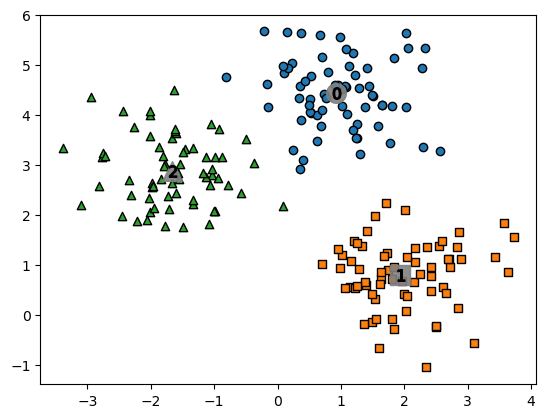

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

target 값과 군집 label값 비교

In [64]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균이동의 장점은 데이터 세트의 형태를 특정형태로 가정한다든가, 특정분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능
- 또한, 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없음
- 평균 이동은 알고리즘 수행 시간이 오래 걸리고 bandwidth의 크기에 따른 군집화 영향도가 매우 크다
- 이런 특징 때문에 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데뛰어난 역할을 수행하는 알고리즘

### 7-4. GMM(Gaussian Mixture Model)

GMM(Gaussian Mixture Model) 소개

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식

·섞인 데이터 분포에서 개별 유형의 가우시안 분포 추출 => 개별 데이터가 이 중 어떤 정규분포에 속하는지 찾고 데이터가 특정 정규 분포에 해당될 확률 구함
 - 이를 모수 추정이라 함
![7-12](img7/7-19.png)
![7-13](img7/7-20.png)
![7-14](img7/7-21.png)
![7-15](img7/7-22.png)

·모수 추정은 대표적으로 2가지 추정

 1) 개별 정규 분포의 평균과 분산  
 2) 각 데이터가 어떤 정규 분포에 해당되는지의 확률

·모수 추정 위해 GMM은 EM 방법 사용 

 - EM(Expectation and Maximization) : 개별 정규 분포의 모수인 평균과 분산이 더이상 변경되지 않고 각 개별 데이터들이 이전 정규 분포 소속이 더 이상 변경되지 않으면 그것을 최종 군집화로 결정(변경되면 계속 EM)

#### GMM(Gaussian Mixture Model)을 이용한 붓꽃 데이터 세트 군집화

- GMM은 확률기반 군집화이고, K 평균은 거리기반 군집화
- 두 방식 비교

In [65]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이다

이는 모델의 총 개수

In [66]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


=> k-평균 군집화 결과보다 더 효과적인 분류 결과 도출 ( GMM이 더 뛰어나다는 의미라기 보단 붓꽃 데이터 세트에는 GMM이 더 효과적이라는 뜻)

k-평균은 평균 거리 중심으로 중심을 이동하므로 군집 내의 데이터가 원형으로 흩어진 경우 효과적

In [67]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


#### GMM과 K-평균의 비교

- KMeans 는 원형의 범위에서 군집화를 수행
- 데이터세트가 원형의 범위를 가질수록 Kmeans 의 군집화 효율은 더욱 높아짐
- 다음은 make_blobs() 의 군집의 수를 3개로 하되, cluster_std 를 0.5 로 설정해 군집내의 데이터를 뭉치게 유도한 데이터세트에 KMeans 를 적용한 결과
![7-16](img7/7-23.png)

그러면 데이터가 원형의 범위로 퍼져 있지 않는다면?
군집 시각화 함수 visualize_cluster_plot() 

- clusterobj: 사이킷런의 군집 수행 객체. KMeans 나 GaussianMixture 의 fit()와 predict()로 군집화를 완료한 객체.  
- dataframe: 피처 데이터세트와 label 값을 가진 DataFrame  
- label_name: dataframe 내의 군집화 label 칼럼명  
- iscenter: 객체가 군집 중심좌표를 제공하면 true  

In [68]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

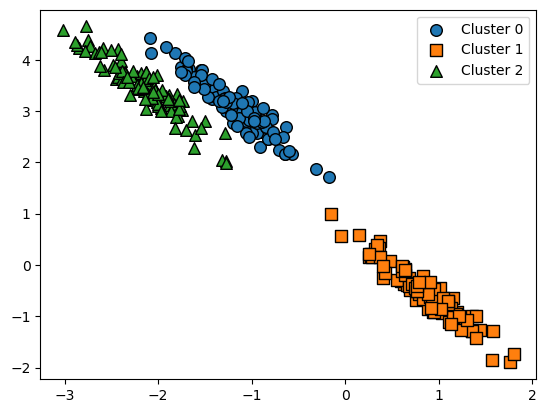

In [69]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


=> 위와 같은 데이터의 경우 kmeans의 군집화 정확성이 떨어짐

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


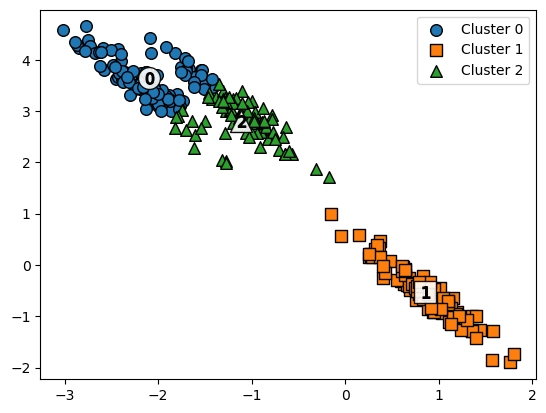

In [70]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

=> 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음

∴길쭉한 방향으로 데이터가 밀접해 있을 경우 최적의 군집화가 어려움

GMM의 경우

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


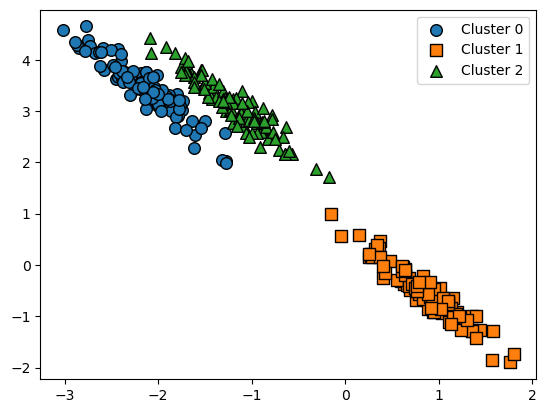

In [71]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)


=> 데이터가 분포된 방향에 따라 정확하게 군집화되었음을 알 수 있다

(GMM은 군집 중심 좌표를 구할 수 없기 떄문에 군집 중심 표현이 시각화되지 않음)

In [72]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


위의 데이터 target값과 군집 label값을 각각 비교해 보았다

GMM의 경우 kmeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만 수행 시간이오래 걸린다는 단점이 있다

### 5-5. DBSCAN (Density Based Spatial Clustering of Applications with Noise)

DBSCAN 개요

·특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행함

·단점:  데이터 밀도가 자주 변하거나 아예 변화하지 않는 것, 피처 개수가 많은 데이터인 경우에는 군집화 성능이 떨어진다

·이를 구성하는 가장 중요한 두가지 파라미터
 1) 입실론으로 표기하는 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
 2) 입실론 주변 영역에 포함되는 최소 데이터 개수 min points : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

· 주변 영역 내에 포함되는 최소 데이터 개수를 총족시키는가 아닌가에 따른 데이터 포인트 정의
 1) 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우   
 2) 이웃 포인트 : 주변 영역 내에 위치한 타 데이터  
 3) 경계 포인트 :  주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터/ 군집의 외곽 형성  
 4) 잡음 포인트 :  최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터


1. DBSCAN 군집화 적용. 데이터세트 6개 가정
![7-17](img7/7-28.png)
2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신은 P1, 이웃데이터 P2, P6, P7, P8, P9, P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트
![7-18](img7/7-29.png)
3. P2 데이터 기준 (최소 데이터 6개로 핵심 포인트)
![7-19](img7/7-30.png)
4. 핵심포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2 로 연결해 직접 접근이 가능
![7-20](img7/7-31.png)
5. 특정 핵심포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성. 이러한 방식으로 점차적으로 군집 영역을 확장해 나가는 것이 DBSCAN 군집화 방식
![7-21](img7/7-32.png)
6. P3는 반경내에 P2, p4로 2개 이므로 핵심포인트가 아님. 이웃데이터 중에 핵심포인트 P2 를 가지고 있어 경계 포인트(군집의 외곽을 형성)
![7-22](img7/7-33.png)
7. P5는 잡음포인트
![7-23](img7/7-34.png)

·핵심 포인트의 이웃 포인트 또한 핵심 포인트인 경우 서로 연결해 직접 접근이 가능하다
 - 이렇게 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화 구성

이처럼 DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심포인트를 연결하면서 군집화를 구성하는 방식

·사이킷런 DBSCAN 클래스의 주요 파라미터 
 - eps : 입실론 주변 영역의 반경
 - min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터 최소 개수

#### DBSCAN 적용하기 – 붓꽃 데이터 셋

일반적으로 eps 값은 1이하의 값을 설정함

In [73]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


=> dbscan_cluster에서 -1은 노이즈에 속하는 군집

DBSCAN으로 군집화 데이터 세트를 2차원 평면에 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환 후 시각화

In [75]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

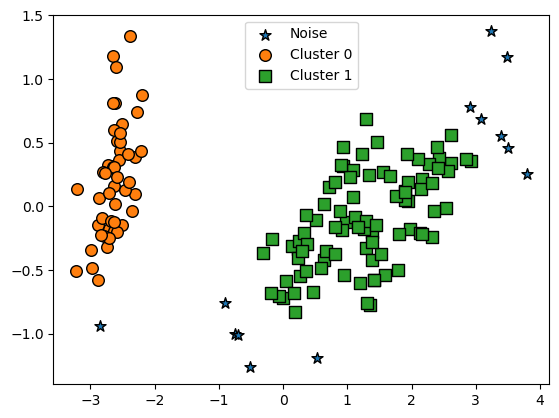

In [76]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

=> PCA를 이용하니 노이즈 데이터가 명확히 드러난다

※DBSCAN을 적용 시 특정 군집 개수로 군집을 강제하지 않는 것이 좋음

   파라미터들을 통해 최적의 군집을 찾는 것이 중요 !

·일반적으로 eps 값을 크게 하면 반경이 커져 노이즈 데이터 개수가 작아짐  
·min_samples 값을 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커짐

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


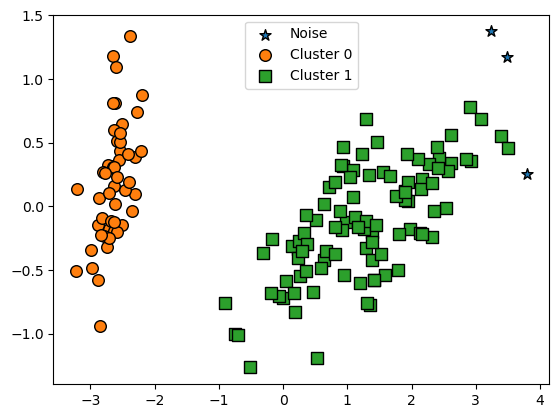

In [77]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


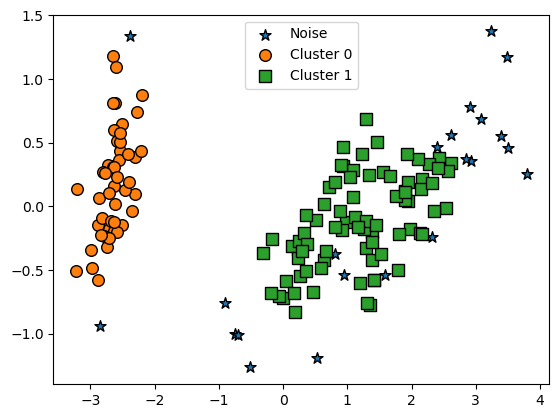

In [78]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#### DBSCAN 적용하기 – make_circles() 데이터 세트

이번에는 복잡한 기하학적 분포를 가지는 데이터 세트에서 알고리즘들 비교

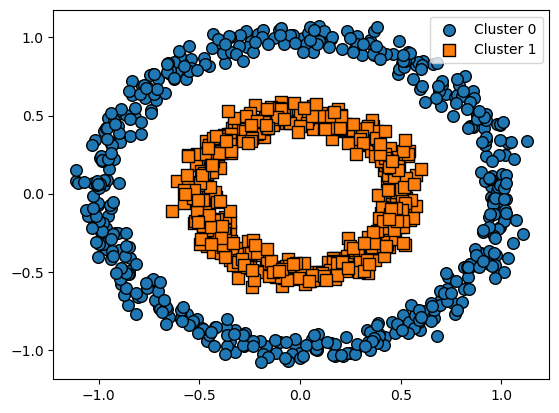

In [79]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
# factor : 외부원과 내부원의 scale 비율

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


=> 내부 원과 외부 원으로 비교되는 데이터 세트 생성

먼저 K-평균으로 군집화

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


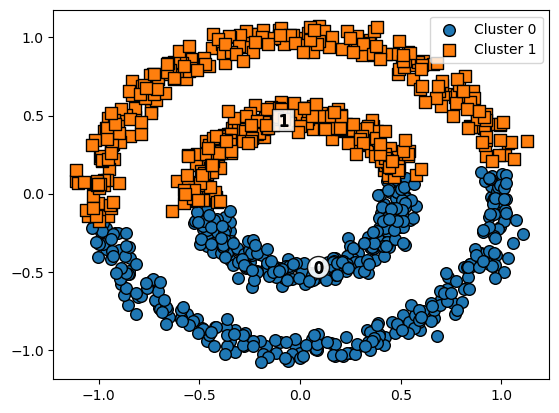

In [80]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

=> 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

GMM 군집화 적용

c:\Users\koll2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


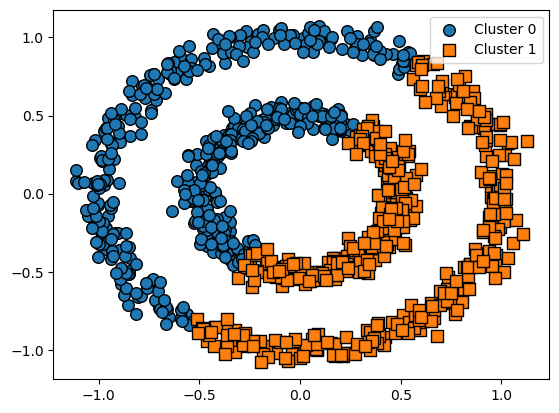

In [81]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

=> K-평균과 비슷하게 군집화됨

DBSCAN으로 군집화

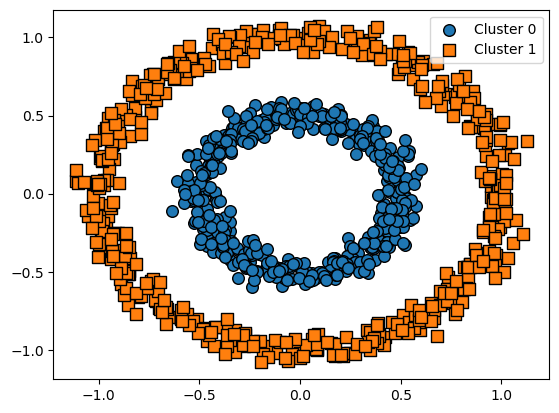

In [82]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

=> 원하는 방향으로 정확히 군집화가 됐음을 알 수 있음

### 7-6. 군집화실습 - 고객세그먼테이션

고객 세그먼테이션이란 다양한 기준으로 고객을 분류하는 기법 / CRM이나 마케팅의 중요 기반 요소

![7-24](img7/7-42.png)

주요 목표는 '타겟 마케팅'( = 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것)

기업의 마케팅은 고객의 상품 구매 이력에서 출발

고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요한데, 여기서는 RFM 기법을 이용할 것

※RFM이란 Recenct, Frequency, Monetary Value의 각 앞글자를 합한 것
- Recenct: 가장 최근 상품 구입 일에서 오늘까지의 기간
- Frequency: 상품구매 횟수
- Monetary Value: 총 구매금액

### 데이터 셋 로딩과 데이터 클린징

https://archive.ics.uci.edu/ml/datasets/online+retail
![7-25](img7/7-43.png)

Data Folder 를 클릭한 뒤 online retail.xslx 파일 다운로드

In [83]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='train/Online_Retail.xlsx')
retail_df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'train/Online_Retail.xlsx'

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


=> CustomerID의 null값이 많으며 다른 컬럼에도 존재하므로 정제 작업 필요

- CustomerID가 없는 데이터는 삭제(∵고객 세그먼테이션이므로)
- 다른 오류데이터들도 삭제

In [ ]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

=> 결과는 397884개로 줄었지만 null값은 제거

In [ ]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [ ]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


=> 영국이 대다수를 차지하기 때문에 다른 국가의 데이터는 모두 제외함

#### RFM 기반 데이터 가공
- 이제 사전 정제된 데이터 기반으로 고객 세그먼테이션 군집화를 RFM 기반으로 수행

In [ ]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

개인 고객의 주문과 소매점의 주문이 함께 포함되어 있기 때문에 압도적으로 특정 고객에게 많은 특성을 가지고 있다

Top 5 주문건수와 주문 금액을 가진 고객 데이터 추출

In [ ]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


이 데이터 세트는 주문번호+상품코드 레벨의 식별자로 되어있다. 그러므로 주문번호+상품코드를 이용해 Groupby를 이용하면 거의 1에 가깝게 유일한 식별자 레벨이 됨

In [ ]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

RFM기반의 세그먼테이션을 하므로 주문번호+상품코드 기준의 데이터를 고객 기준의 R,F,M 데이터로 변경

이를 위해서는 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Groupby 필요

In [ ]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


=> Recency 칼럼은 가공이 더 필요함

Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 오늘 날짜(마지막 날짜+1)를 기준으로 가장 최근 주문일자를 뺀 날짜

In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


#### RFM 기반 고객 세그먼테이션

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

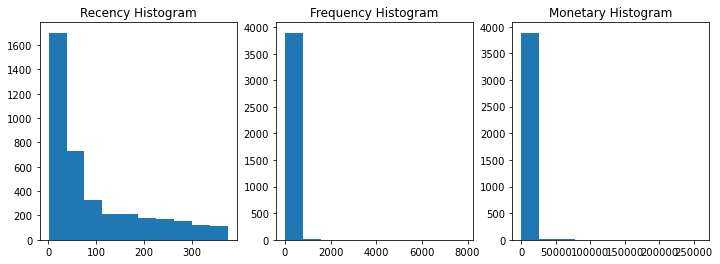

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

=> 개인 고객과 소매업체 둘다 있기 때문에 왜곡이 큰 편

In [ ]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


=> 평균과 50% 값을 비교해보면 매우 큰 값들로 인해 왜곡이 심함을 알 수 있다

왜곡 정도가 높은 데이터 세트에 k-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨

그러므로 StandardScaler로 평균과 표준편차를 재조정한 뒤 k-평균 수행

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


=> 군집을 3개로 구성할 경우 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 안정적인 수치가 나옴

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

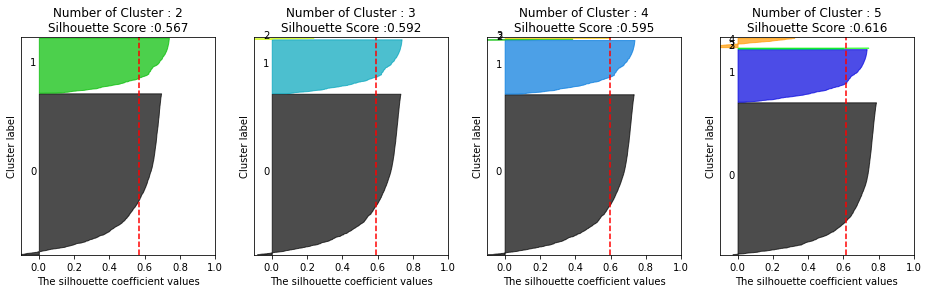

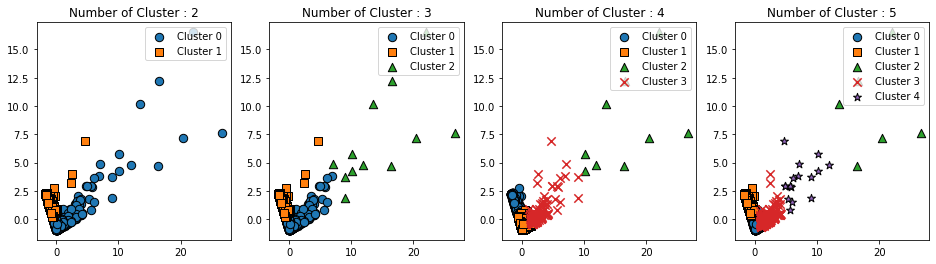

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

=> 왜곡으로 인해 실루엣 계수는 안정적이지만 군집의 분리는 의미없는 상태

왜곡 정도를 낮추기 위해 주로 사용되는 방법 : 로그 적용

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.303


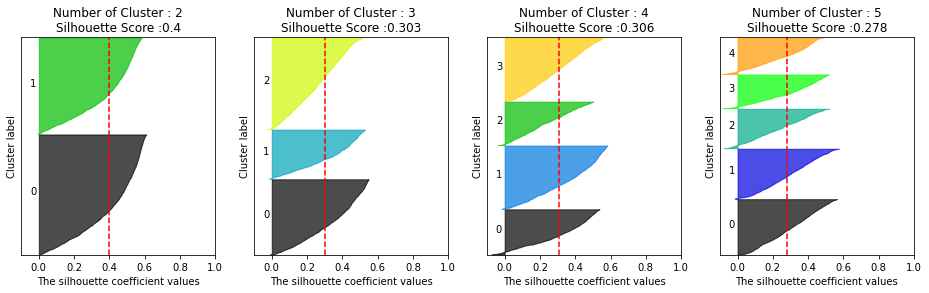

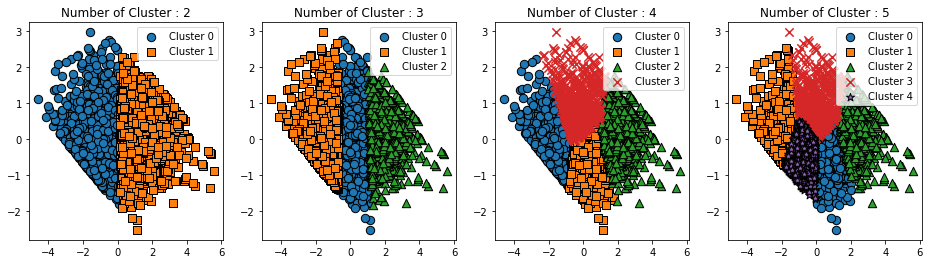

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

=> 실루엣 스코어는 변환 전보다 떨어지지만 군집화 구성은 더 균일하다

그러므로 실루엣 스코어의 절대치가 중요한 것은 아님을 알 수 있다

∴왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후 군집화 수행하기 !